# Evolución diaria del factor problemático (F) de la pandemia Argentina

F = (Nivel de exposición * probabilidad de contagio + 1) 

I<sub>n+1</sub> = I<sub>n</sub> * F

donde I<sub>n+1</sub> es la cantidad de casos para un día mientras que I<sub>n</sub> es la cantidad de casos para el día anterior, entonces

&rarr; F = I<sub>n+1</sub> / I<sub>n</sub>

<br>
<br>
<br>
<br>
__fuente__: Damián Pedraza @eltraductor_ok en https://youtu.be/-PUT0hZiZEw

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import requests
from io import StringIO

## Lectura de los datos

Disponible en: https://docs.google.com/spreadsheets/d/1Oso4ZC_mMOwtv6p5u65VpdzJQxnmF8bu6kxVygku_sc/edit?usp=sharing
__fuente__: Informe diario del Minsiterio de Salud &rarr; https://www.argentina.gob.ar/coronavirus/informe-diario

In [3]:
file_url = 'https://docs.google.com/spreadsheets/d/1Oso4ZC_mMOwtv6p5u65VpdzJQxnmF8bu6kxVygku_sc/export?format=csv&id=1Oso4ZC_mMOwtv6p5u65VpdzJQxnmF8bu6kxVygku_sc&gid=0'
file_text = requests.get(file_url).text
csv_raw = StringIO(file_text)
data = pd.read_csv(csv_raw)

Vista previa:

In [4]:
data.head()

,dia,casos,fallecidos
0,05/03/2020,1,0
1,06/03/2020,2,0
2,07/03/2020,2,0
3,08/03/2020,12,0
4,09/03/2020,17,0


## Calcular Factor problemático

In [5]:
data.loc[0, 'F'] = 0

In [6]:
for hoy in range(1, len(data)):
    # el F para hoy es: casos hoy / casos ayer 
    data.loc[hoy, 'F'] = data.loc[hoy, 'casos'] / data.loc[ hoy -1 , 'casos']

In [7]:
data

,dia,casos,fallecidos,F
0,05/03/2020,1,0,0.000000
1,06/03/2020,2,0,2.000000
2,07/03/2020,2,0,1.000000
3,08/03/2020,12,0,6.000000
4,09/03/2020,17,0,1.416667
5,10/03/2020,19,1,1.117647
6,11/03/2020,21,1,1.105263
7,12/03/2020,31,1,1.476190
8,13/03/2020,34,2,1.096774
9,14/03/2020,45,2,1.323529


## Graficar

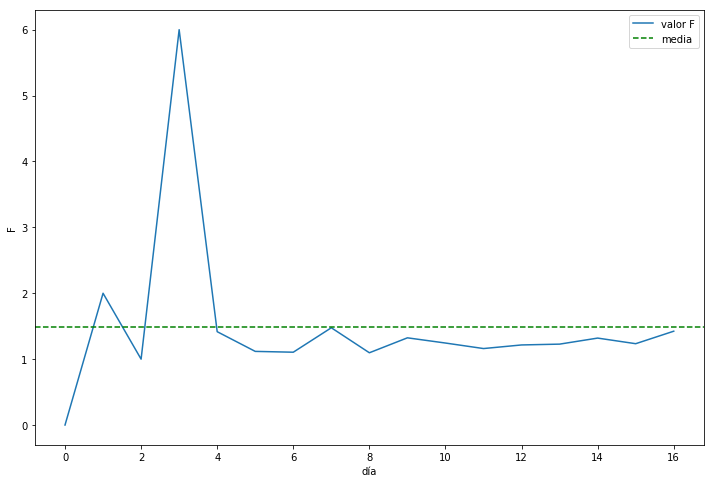

In [8]:
import matplotlib.pyplot as plt
ax = plt.gca()

data.F.plot(label='valor F', figsize=(12, 8))
plt.axhline(data.F.mean(), color='g', linestyle='--', label='media')

plt.ylabel('F')
plt.xlabel('día')
plt.legend()

plt.show()

In [9]:
data.loc[0, 'evolucion_de_la_media_de_F'] = data.loc[0, 'F']

In [10]:
for hoy in range(1, len(data)):
    # el F para hoy es: casos hoy / casos ayer 
    data.loc[hoy, 'evolucion_de_la_media_de_F'] = data.loc[0:hoy, 'F'].mean()

In [11]:
data

,dia,casos,fallecidos,F,evolucion_de_la_media_de_F
0,05/03/2020,1,0,0.000000,0.000000
1,06/03/2020,2,0,2.000000,1.000000
2,07/03/2020,2,0,1.000000,1.000000
3,08/03/2020,12,0,6.000000,2.250000
4,09/03/2020,17,0,1.416667,2.083333
5,10/03/2020,19,1,1.117647,1.922386
6,11/03/2020,21,1,1.105263,1.805654
7,12/03/2020,31,1,1.476190,1.764471
8,13/03/2020,34,2,1.096774,1.690282
9,14/03/2020,45,2,1.323529,1.653607


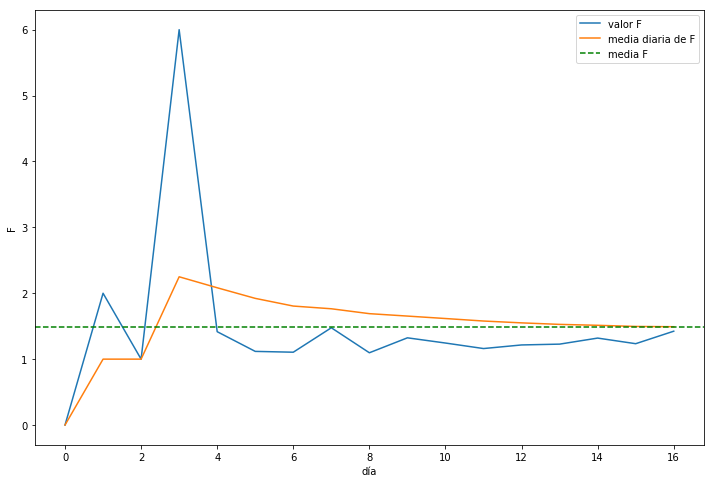

In [12]:
import matplotlib.pyplot as plt
ax = plt.gca()

data.F.plot(label='valor F', figsize=(12, 8))
data.evolucion_de_la_media_de_F.plot(label='media diaria de F')

plt.axhline(data.F.mean(), color='g', linestyle='--', label='media F')

plt.ylabel('F')
plt.xlabel('día')
plt.legend()

plt.show()

WIP:
- Lectura desde drive: ok
- Cargar datasets de otros países
- ...